## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import urllib
import csv
import glob
import numpy as np
import matplotlib.patches as mpatches



#
tv_movies_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    
tv_movies_df.head()


#combine_df
tv_movies_df.head()
tv_movies_df1 =tv_movies_df.drop('Unnamed: 0',axis=1)
tv_movies_df1.head()

#age_sets = tv_movies_df1["Age"].unique()
#age_sets
age_sets2 = ['all', '7+', '13+', '16+', '18+']
print(age_sets2)
tv_movies_df1.head()
tv_movies_df1.head()

['all', '7+', '13+', '16+', '18+']


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [9]:
tv_movies_df1["IMDb"] = tv_movies_df1["IMDb"].astype(float)

test_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=0)  ] 
                             
                #(tv_movies_df1["IMDb"] !="NaN")]
                                      
                                     
htest_df = tv_movies_df1.loc[(tv_movies_df1["movies"] =="Movie") &
                            (tv_movies_df1["IMDb"] >=8)  ] 
                
                             

htest_df.describe
test_df.describe

<bound method NDFrame.describe of                                 Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+   8.8             87%   
1                          The Matrix  1999  18+   8.7             87%   
2              Avengers: Infinity War  2018  13+   8.5             84%   
3                  Back to the Future  1985   7+   8.5             96%   
4      The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...                               ...   ...  ...   ...             ...   
16738    Whispers: An Elephant's Tale  2000  all   5.0             NaN   
16739       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740                  The Poof Point  2001   7+   4.7             NaN   
16741           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742              Man Among Cheetahs  2017  NaN   6.6             NaN   

      Netflix Hulu Prime Video Disney+ Type                       Directors  

In [10]:
test2_df = test_df.loc[(test_df["Netflix"] == "1")]
test3_df = test_df.loc[(test_df["Hulu"] == "1")]
test4_df = test_df.loc[(test_df["Prime Video"] == "1")]
test5_df = test_df.loc[(test_df["Disney+"] == "1")]



htest2_df = htest_df.loc[(htest_df["Netflix"] == "1")]
htest3_df = htest_df.loc[(htest_df["Hulu"] == "1")]
htest4_df = htest_df.loc[(htest_df["Prime Video"] == "1")]
htest5_df = htest_df.loc[(htest_df["Disney+"] == "1")]







print(test2_df)
print(htest2_df)


                                                  Title  Year  Age  IMDb  \
0                                             Inception  2010  13+   8.8   
1                                            The Matrix  1999  18+   8.7   
2                                Avengers: Infinity War  2018  13+   8.5   
3                                    Back to the Future  1985   7+   8.5   
4                        The Good, the Bad and the Ugly  1966  18+   8.8   
...                                                 ...   ...  ...   ...   
3459                                   It's Okay, Buddy  2017  NaN   3.1   
3460                                  Behind 'The Cove'  2015  NaN   3.7   
3461  Edmilson Filho: Notas, Comedy about Relationships  2018  NaN   5.8   
3462                                           Hattrick  2007   7+   4.2   
3468                                                EMI  2008  NaN   4.3   

     Rotten Tomatoes Netflix Hulu Prime Video Disney+ Type  \
0                87%     

In [18]:
s2 = test2_df.groupby("Age")["Netflix"].count().to_frame(name = "nf-age").reset_index()
s3 = test3_df.groupby("Age")["Hulu"].count().to_frame(name = "hu-age").reset_index()
s4 = test4_df.groupby("Age")["Prime Video"].count().to_frame(name = "pv-age").reset_index()
s5 = test5_df.groupby("Age")["Disney+"].count().to_frame(name = "di-age").reset_index()

s2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
s5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

s2.sort_values(by = "Age", inplace = True)
s3.sort_values(by = "Age", inplace = True)
s4.sort_values(by = "Age", inplace = True)
s5.sort_values(by = "Age", inplace = True)

print(s2)
print(s3)
print(s4)
print(s5)





hs2 = htest2_df.groupby("Age")["Netflix"].count().to_frame(name = "hnf-age").reset_index()
hs3 = htest3_df.groupby("Age")["Hulu"].count().to_frame(name = "hhu-age").reset_index()
hs4 = htest4_df.groupby("Age")["Prime Video"].count().to_frame(name = "hpv-age").reset_index()
hs5 = htest5_df.groupby("Age")["Disney+"].count().to_frame(name = "hdi-age").reset_index()

hs2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
hs5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

hs2.sort_values(by = "Age", inplace = True)
hs3.sort_values(by = "Age", inplace = True)
hs4.sort_values(by = "Age", inplace = True)
hs5.sort_values(by = "Age", inplace = True)

print(hs2)
print(hs3)
print(hs4)
print(hs5)







ms2 = test2_df.groupby("Age")["IMDb"].mean().to_frame(name = "mnf-age").reset_index()
ms3 = test3_df.groupby("Age")["IMDb"].mean().to_frame(name = "mhu-age").reset_index()
ms4 = test4_df.groupby("Age")["IMDb"].mean().to_frame(name = "mpv-age").reset_index()
ms5 = test5_df.groupby("Age")["IMDb"].mean().to_frame(name = "mdi-age").reset_index()

ms2.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms3.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms4.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)
ms5.replace({'13+':13 ,'16+':16,'18+':18,'7+':7,'all':3}, inplace= True)

ms2.sort_values(by = "Age", inplace = True)
ms3.sort_values(by = "Age", inplace = True)
ms4.sort_values(by = "Age", inplace = True)
ms5.sort_values(by = "Age", inplace = True)

print(ms2)
print(ms3)
print(ms4)
print(ms5)




   Age  nf-age
4    3     130
3    7     321
0   13     381
1   16      89
2   18     752
   Age  hu-age
4    3      52
3    7     109
0   13     118
1   16      17
2   18     289
   Age  pv-age
4    3     398
3    7     912
0   13     808
1   16     225
2   18    2607
   Age  di-age
4    3     277
3    7     179
0   13      40
1   16       1
2   18       3
   Age  hnf-age
4    3        9
3    7       19
0   13       18
1   16        2
2   18       37
   Age  hhu-age
4    3        2
3    7        5
0   13        8
1   16        1
2   18       10
   Age  hpv-age
4    3       24
3    7       33
0   13       34
1   16        6
2   18       32
   Age  hdi-age
2    3       14
1    7       12
0   13        6
   Age   mnf-age
4    3  6.276923
3    7  6.203738
0   13  6.345669
1   16  6.323596
2   18  6.289628
   Age   mhu-age
4    3  5.909615
3    7  6.285321
0   13  6.430508
1   16  5.411765
2   18  6.176125
   Age   mpv-age
4    3  6.073367
3    7  5.948684
0   13  5.960396
1   16  5.205333

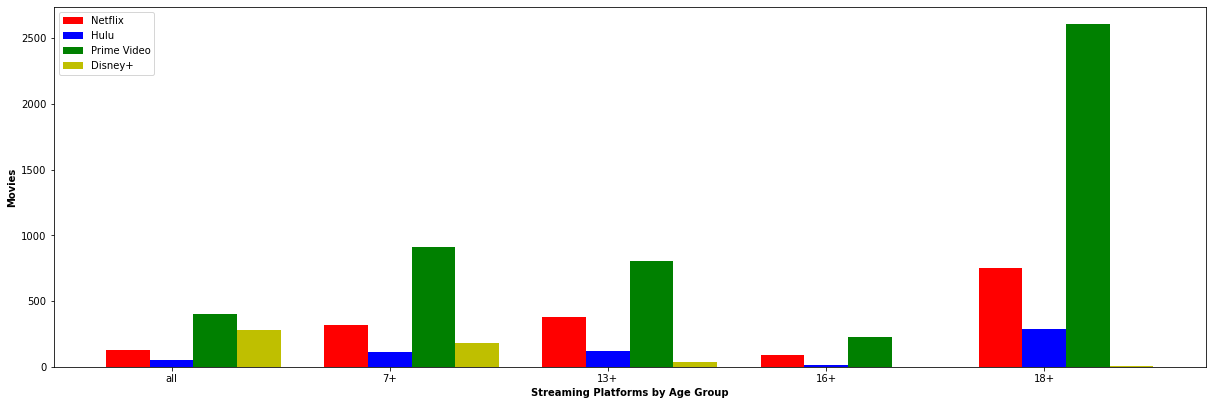

In [23]:
#movie count by age group

fig = plt.figure(figsize = (16,5))

import matplotlib.patches as mpatches

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, s2["nf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, s3["hu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, s4["pv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, s5["di-age"], color = 'y', width = 0.2, label = "Disney+")


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 


plt.legend()
                    
plt.show()


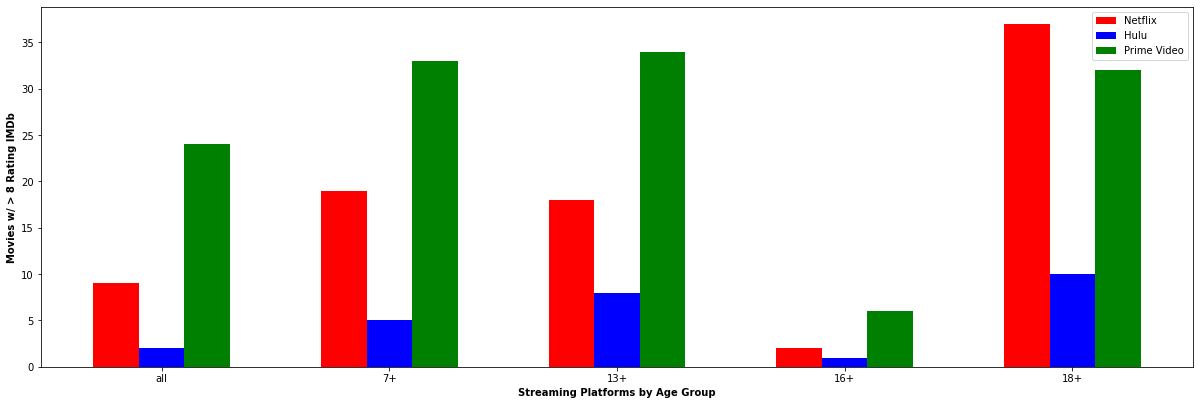

In [26]:
#IMDB greater than 8 by age group

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, hs2["hnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, hs3["hhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, hs4["hpv-age"], color = 'g', width = 0.2, label = "Prime Video")
#ax.bar(x+.6, hs5["hdi-age"], color = 'y', width = 0.2, label = "Disney+")   need to fix having zero values


plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Movies w/ > 8 Rating IMDb', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 

plt.legend()
                    
plt.show()

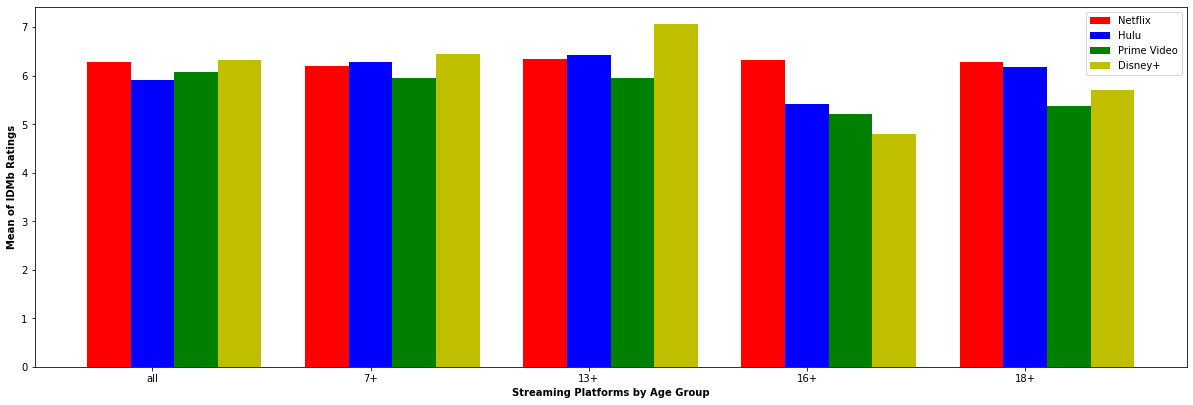

In [28]:

#IMDB mean for each age group

fig = plt.figure(figsize = (16,5))

x = np.arange(5)

ax = fig.add_axes([0,0,1,1])
ax.bar(x, ms2["mnf-age"], color = 'r', width = 0.2, label = "Netflix")
ax.bar(x+.2, ms3["mhu-age"], color = 'b', width = 0.2, label = "Hulu")
ax.bar(x+ .4, ms4["mpv-age"], color = 'g', width = 0.2, label = "Prime Video")
ax.bar(x+.6, ms5["mdi-age"], color = 'y', width = 0.2, label = "Disney+")



plt.xlabel('Streaming Platforms by Age Group', fontweight ='bold') 
plt.ylabel('Mean of IDMb Ratings', fontweight ='bold') 
#plt.xticks(['all', '7+', '13+', '16+', '18+']) 
plt.xticks([r + .2 for r in range(5)], 
           ['all', '7+', '13+', '16+', '18+']) 

plt.legend()
                
                    
plt.show()

In [39]:
#sumstats = tv_movies_df1.groupby(["Age","Netflix"]).sum()
#sumstats = tv_movies_df1.groupby(["Age","Netflix","Hulu"])["Title"].value_counts()
#sumstats = tv_movies_df1.groupby("Age")["Netflix"].value_counts()

#sumstats = tv_movies_df1.groupby(["Age", "Netflix"])["movies"].count()
#sumstats2 = tv_movies_df1.groupby("Age")["Hulu"].count()

test2_df = test_df.loc[(test_df["Netflix"] ==1)] 




sumstats = tv_movies_df1.groupby("Age")["movies"].count()
sumstats2 = tv_movies_df1.groupby("Age")["IMDb"].mean()
sumstats2 = tv_movies_df1.groupby(["Age", "Netflix"])["IMDb"].get_group("Type")

sumstats
sumstats2

ValueError: must supply a tuple to get_group with multiple grouping keys

<BarContainer object of 5 artists>

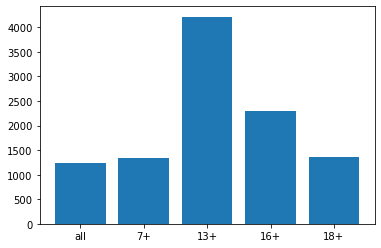

In [34]:
#plt.bar(age_sets2,SumStats)
plt.bar(age_sets2,sumstats2)


In [51]:
# Drop any duplicate rows
#see above

In [52]:
# Recheck the number of mice
#mouse2_count = len(drop_df["Mouse ID"].unique())

#print(f"The second mouse count = {mouse2_count}")


The second mouse count = 249


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

#Stats are created by Groupby Drug Regimen single column of Tumor volume & aggregate stats
#SumStats = tv_movies_df1.groupby("Age")["IMDb"].agg({'mean','median', 'var', 'std', 'sem'})



#SumStats = tv_movies_df1.groupby(["Age","Netflix"]).count()

SumStats = tv_movies_df1.groupby(["Age","Netflix"]).sum()



SumStats

IMDb
Age Netflix         
13+ 0         5197.6
    1         2436.4
16+ 0         5586.4
    1         3543.0
18+ 0        17657.6
    1         7338.6
7+  0        10642.9
    1         4112.7
all 0         6833.0
    1         1959.7

<BarContainer object of 5 artists>

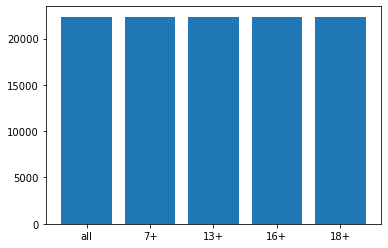

In [43]:

plt.bar(age_sets2,len(tv_movies_df1["Netflix"]))


## Bar and Pie Charts

In [4]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#dl_df.head()
dl = (drop_df["Drug Regimen"]).value_counts()

dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()

dl_df = dl_df.rename(columns={})

dl = (drop_df["Drug Regimen"]).value_counts()
#df2 = df.groupby(['timeIndex'])['isZero'].sum().to_frame('isZero').reset_index()
dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()




#drop_df.plot(x="Drug Regimen", y ="Timepoint", kind ="bar" )
dl_df.plot(x="index", y ="Drug Regimen", kind ="bar" )

# Add labels to the x and y axes
plt.title("Total datapoints for each Drug Regimen")
plt.xlabel("Drug types")
plt.ylabel("Drug data counts")

plt.show()
dl_df

NameError: name 'drop_df' is not defined

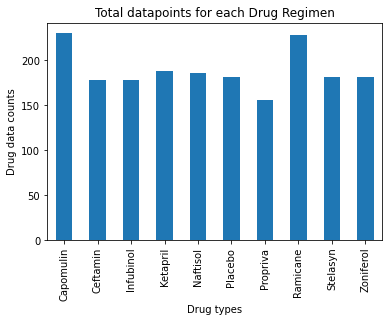

In [55]:
# General identical bar plot using pyplot instead of pandas.

drop_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind='bar')


plt.title("Total datapoints for each Drug Regimen")
plt.xlabel("Drug types")
plt.ylabel("Drug data counts")

plt.show()

Text(0.5, 1.0, 'Mouse counts by Sex')

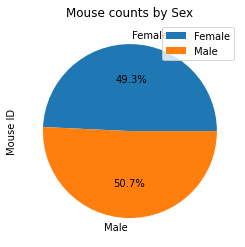

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sx = drop_df.groupby("Sex")["Mouse ID"].count()

sx_df = pd.DataFrame(sx)
sx_df = sx_df.reset_index()

sx_df

sexes = ["Female", "Male"]

sx_df.plot(y="Mouse ID",kind = "pie",autopct="%1.1f%%",labels = sexes)


plt.title("Mouse counts by Sex")


Text(0, 0.5, '')

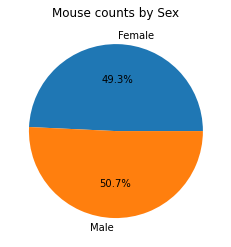

In [57]:
# Generate identical pie plot using pyplot
sexes = ["Female", "Male"]
drop_df.groupby("Sex")["Timepoint"].count().plot(kind='pie',autopct="%1.1f%%",labels = sexes)
plt.title("Mouse counts by Sex")

plt.ylabel("")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


caps = drop_df.groupby(["Mouse ID"])

#find max for each timepoint
test3 = caps.agg({'max'})["Timepoint"]

#reset index
test3 = test3.reset_index()

test3.rename(columns={'max': 'Timepoint'}, inplace=True)

#test 3 is dataframe of final timepoint for each mouse in study
test3 = test3.merge(drop_df,how="left",on =["Mouse ID","Timepoint"])

test3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


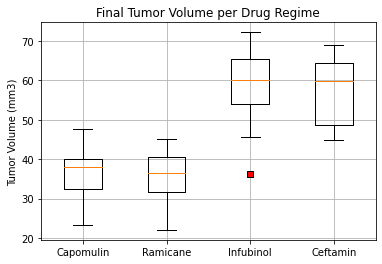

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

captv = []
ramtv = []
inftv = []
ceftv = []

#create individual drug lists/final tumor size
for x in range(len(test3)):
    if test3.iloc[x,2]=="Capomulin":
        cap = test3.iloc[x,6]
        captv.append(cap)
    if test3.iloc[x,2]=="Ramicane":
        ram = test3.iloc[x,6]
        ramtv.append(ram)
    if test3.iloc[x,2]=="Infubinol":
        inf = test3.iloc[x,6]
        inftv.append(inf)
    if test3.iloc[x,2]=="Ceftamin":
        cef= test3.iloc[x,6]
        ceftv.append(cef)

#create individual dataframes 
Capomuli_df = pd.DataFrame(captv)
Capomuli_df.columns = ["tumor"]

Ramicane_df = pd.DataFrame(ramtv)
Ramicane_df.columns = ["tumor"]

Infubinol_df = pd.DataFrame(inftv)
Infubinol_df.columns = ["tumor"]

Ceftamin_df = pd.DataFrame(ceftv)
Ceftamin_df.columns = ["tumor"]


#plot boxplots
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug Regime')
ax1.set_ylabel('Tumor Volume (mm3)')

all = [Capomuli_df["tumor"],Ramicane_df["tumor"],Infubinol_df["tumor"],Ceftamin_df["tumor"]]
red_square = dict(markerfacecolor='r', marker='s')

plt.boxplot(all,flierprops=red_square)
ax1.set_xticklabels(druglist)
plt.grid()

plt.show()

In [60]:
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

captv = []
ramtv = []
inftv = []
ceftv = []

#create individual drug lists
for x in range(len(test3)):
    if test3.iloc[x,2]=="Capomulin":
        cap = test3.iloc[x,6]
        captv.append(cap)
    if test3.iloc[x,2]=="Ramicane":
        ram = test3.iloc[x,6]
        ramtv.append(ram)
    if test3.iloc[x,2]=="Infubinol":
        inf = test3.iloc[x,6]
        inftv.append(inf)
    if test3.iloc[x,2]=="Ceftamin":
        cef= test3.iloc[x,6]
        ceftv.append(cef)

Capomuli_df = pd.DataFrame(captv)
Capomuli_df.columns = ["tumor"]

Ramicane_df = pd.DataFrame(ramtv)
Ramicane_df.columns = ["tumor"]

Infubinol_df = pd.DataFrame(inftv)
Infubinol_df.columns = ["tumor"]

Ceftamin_df = pd.DataFrame(ceftv)
Ceftamin_df.columns = ["tumor"]


quartiles = Capomuli_df["tumor"].quantile([.25,.5,.75])

#quartiles = captv_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of Capomuli is: {lowerq}")
print(f"The upper quartile of Capomuli is: {upperq}")
print(f"The interquartile range of Capomuli is: {iqr}")
print(f"The the median of Capomuli is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

quartiles = Ramicane_df["tumor"].quantile([.25,.5,.75])

#quartiles = captv_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

quartiles = Infubinol_df["tumor"].quantile([.25,.5,.75])

#quartiles = captv_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

quartiles = Ceftamin_df["tumor"].quantile([.25,.5,.75])

#quartiles = captv_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomuli is: 32.37735684
The upper quartile of Capomuli is: 40.1592203
The interquartile range of Capomuli is: 7.781863460000004
The the median of Capomuli is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile 

## Line and Scatter Plots

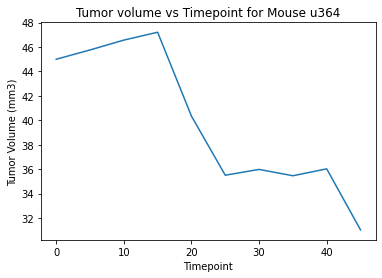

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

#create Capomulin only dataframe
cap_a = drop_df.loc[drop_df["Drug Regimen"] == "Capomulin"]

#choose a randon mouse id from Capomulin list
random_mouse = cap_a.iloc[44,0]

#get df of all timepoints for unique mouse id
cap_id = drop_df.loc[drop_df["Mouse ID"] == random_mouse]

#create x & y axis & label plot
x_axis = cap_id["Timepoint"]
y_axis = cap_id["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title(f"Tumor volume vs Timepoint for Mouse {random_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


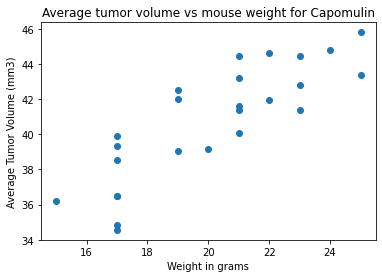

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

#create Capomulin only dataframe
cap_all = drop_df.loc[drop_df["Drug Regimen"] == "Capomulin"]

#create Capomulin average on mouse id
cap_avg = cap_all.groupby(["Mouse ID"]).mean()

#plot scatterplot & label
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.title("Average tumor volume vs mouse weight for Capomulin")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient of mouse weight & average tumor volume is 0.84


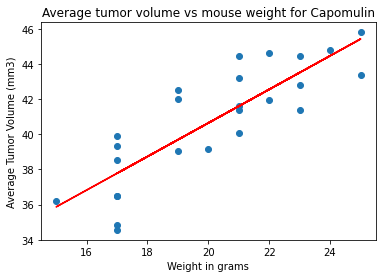

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correl coeff
correl = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient of mouse weight & average tumor volume is {correl}")

#x values
x_values = cap_avg["Weight (g)"]

#calculate scatter & linear regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cap_avg["Weight (g)"],regress_values,"r-")
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])

#label
plt.title("Average tumor volume vs mouse weight for Capomulin")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


# Observations and Insights